This is the base code that transforms one random polygon with n vertices in an another random polygon with the same number of vertices.
\
There are 3 main functions:
\
function generate_subspaces(n) => generate the random subspaces that represent the triangles\
function cs_decomposition(n,E,F,E1,E2,F1,F2) => makes a cs decomposition on the two subspaces generated\
function draw(M, n) => converts the input matrix (the base) into points on the graph that represent the triangle



In [55]:
using LinearAlgebra
using Plots

In [56]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    E1=E[:,1:2]
    E2=E[:,3:end]
    F,=qr(randn(n,n))
    F1=F[:,1:2]
    F2=F[:,3:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [57]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [58]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [60]:
n=3
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([1.9241695804715606 0.2650496345640375 1.237380714121664; 0.11830606094200116 -1.9247940129318273 -0.2528672532551105; -0.11770149882125838 0.014683985949021667 0.6137328407771062], [1.9458092761049353 -0.45357827128621153 0.0; 1.0e-323 1.9995688540767416 0.0; 1.5e-323 3.0e-323 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([1.9876233607183127 1.681855866166167 0.2927996460630946; 0.5317945033724957 1.124061141710198 -0.1943295403302694; -0.5457407543742733 0.5403135109232026 1.731321664858413], [1.2653115630596998 -0.4640807188268129 0.0; 0.0 1.5480610770056145 0.0; 0.0 5.0e-324 0.0]), [-0.9458092761049353 0.2233772404858299; -0.23020103080038162 -0.9731419726507688; 0.22902466821785866 -0.05565347696510309], [0.23568500518020694; -0.0014786763713988058; 0.9718283757173355;;], [-0.26531156305969983 -0.20880501546199637; -0.6728857342888093 -0.6591024365049132; 0.6905320869426914 -0.722

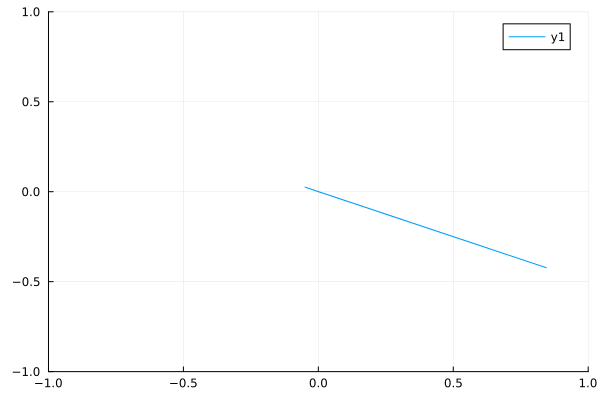

In [61]:
points=draw(E1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

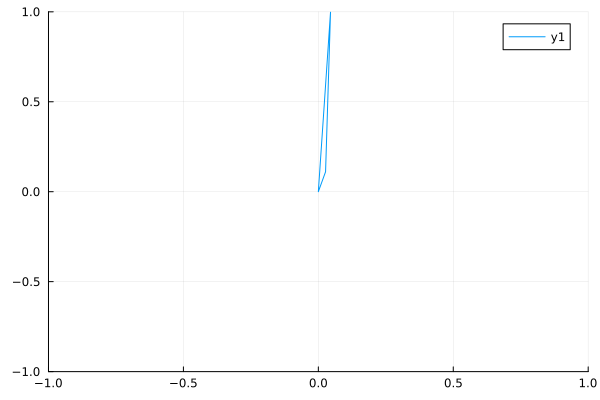

In [62]:
points=draw(F1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

3×3 Matrix{Float64}:
  1.0           0.0       1.78691e-16
 -5.55112e-17   0.25574   0.966746
  2.10426e-16  -0.966746  0.25574

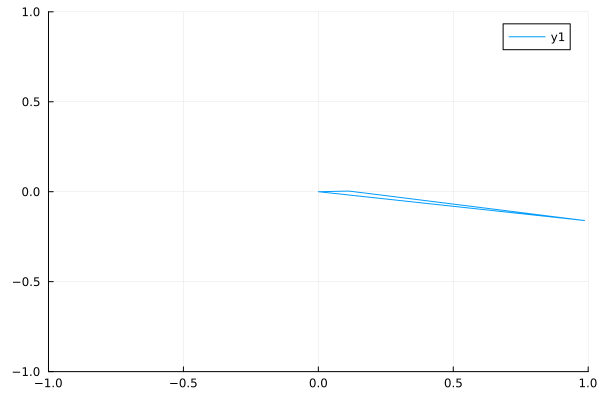

In [63]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
display(D)
points=draw(W*E1*U1, n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])